## Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import re
import math
import datetime
import string

## Importing the dataset

In [2]:
dataset = pd.read_excel('/content/DME Tire Purchase Data(1).xlsx')
##12202 rows 75 columns
#len(dataset)
#len(dataset.columns)

In [4]:
##full dataframe
dataset.head()

,Year,Make,Model,Body Style,Engine,TireQuantity,Vehicle Purchase Date,Estimated Current Odometer,Number Of Owners,Last Owner Length Of Ownership In Days,Lienholder,Retail,Wholesale,Private Party,Vista Segment,Vista Type,Gender Code,Marital Status,Age,Occupation,Education Level,Religion,Race / Ethnicity,Language Spoken,Net Worth,New Credit Range,Num Credit Lines,Working woman in household,Young Adult in household,Household Income,Number of persons in Household,Number of Adults in Household,Median Income,Length of Residence,Presence of Children,Presence of Elderly Parent,Wealth Rating,Home Ownership,Dwelling Type,Median Home Value,Current Home Value,Home Price,Mortgage Amount-Dollars,Mortgage Amount-Range,Retail Credit Card,Bank Credit Card,Credit Card,Owns Premium Store Or Retail,Owns Premium Visa Or Mastercard,Owns Standard Amex,Owns Standard Discover,Owns Standard Visa Or Mastercard,Credit Ranges,Contributor: Mail Donor Indicator,Animal Contributor,Childrens Contributor,Environmental Contributor,General Contributor,Health Contributor,Political Contributor,Religious Contributor,Verterans Contributor,Donates To Art / Cultural,Conservative Party Donor,Liberal Party Donor,Home Decorators,Home Improvement Buyer,Magazine Buyer,Owns Investments,Owns Mutual Funds,Owns Stocks / Bonds,Political Affiliation,A Known Voter,Generations in Household,Political Ideology
0,2011.0,KIA,SORENTO SX,4 Door Wagon/Sport Utility,3.5L V6 F DOHC 24V,4,2017-09-28,79616.0,3.0,1342.0,False,11220.0,6610.0,9220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014.0,FORD,ECONOLINE E250,Van,5.4L V8 F SOHC 16V,4,2014-04-19,145140.0,1.0,2600.0,False,15430.0,10530.0,13350.0,Mature & Practical Shoppers,Up For Grabs,Male,Single,56.0,NaN,High School,Catholic,Hispanic,Spanish,Less than $1,NaN,NaN,NaN,NaN,$20K - $30K,One person,One adult,69.0,NaN,Children present,NaN,9th decile,Renter,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Owns a credit card,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Democratic party,Yes,2 Generations - Adult / Child,L
2,2016.0,CHEVROLET,CRUZE LS,Sedan 4 DR,1.4L I4 F DOHC 16V,4,2019-08-21,156044.0,2.0,650.0,False,9440.0,5090.0,7630.0,Privacy Matters,Up For Grabs,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One person,NaN,NaN,NaN,NaN,NaN,2nd decile,NaN,Multi Family Dwelling/Apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011.0,NISSAN,TITAN S/SV/SL/PRO-4X,Crew Pickup,5.6L V8 F DOHC 32V,4,2018-08-22,152092.0,4.0,1014.0,True,18570.0,10940.0,15270.0,Rustic Families,At Home And In Bulk,Female,Married,54.0,Tradesman/machine/Laborer,High School,Protestant,English,English,"$25,000 - $49,999",$101 - $300,1 Line of credit,Yes,Yes,$90K - $100K,Three persons,Three adults,38.0,9.0,Children present,NaN,9th decile,Home Owner,Single Family,112.0,179.0,237.0,219.0,NaN,Owns a retail card,Owns a credit card,Owns a credit card,Yes,NaN,NaN,NaN,Yes,600-649,NaN,NaN,NaN,NaN,Contributes in general,NaN,Contributes in political causes,NaN,NaN,NaN,Yes,NaN,Purchased home decor products and services,Purchased home improvement products and services,Purchased / subscribed to a magazine,Yes,Yes,Yes,Republican party,Yes,3 Generations - Adult / Child / Parent,NaN
4,2014.0,LAND ROVER,LR2 HSE,4 Door Wagon/Sport Utility,2.0L I4 F DOHC 16V,4,2019-11-26,47900.0,3.0,553.0,False,19320.0,12960.0,16620.0,Rustic Families,At Home And In Bulk,Female,Married,47.0,Tradesman/machine/Laborer,High School,Protestant,White non-American,English,"$25,000 - $49,999",NaN,NaN,Yes,Yes,$70K - $80K,Two persons,Two adults,92.0,8.0,Children present,NaN,7th decile,Home Owner,Single Family,NaN,187.0,187.0,NaN,NaN,Owns a retail card,Owns a credit

In [ ]:
##dataset.columns

In [39]:
##select columns
dataset1=dataset[['Year', 'Make', 'Model', 'Body Style', 'Engine', 'TireQuantity',
       'Vehicle Purchase Date', 'Estimated Current Odometer',
       'Number Of Owners', 'Last Owner Length Of Ownership In Days',
       'Lienholder', 'Retail', 'Wholesale', 'Private Party',
       'Vista Type', 'Gender Code', 'Marital Status', 'Age', 'Occupation',
       'Education Level','Wealth Rating','Home Ownership','Credit Card']]

In [40]:
##rename里几个columns
dataset1.rename(columns = {"Gender Code": "GenderCode"},inplace=True) 
dataset1.rename(columns = {"Body Style": "BodyStyle"},inplace=True) 
dataset1.rename(columns = {"Vehicle Purchase Date": "PurchaseDate"},inplace=True) 
dataset1.rename(columns = {"Estimated Current Odometer": "EstimatedCurrentOdometer"},inplace=True) 
dataset1.rename(columns = {"Wealth Rating": "WealthRating"},inplace=True) 
dataset1.rename(columns = {"Home Ownership": "HomeOwnership"},inplace=True) 
dataset1.rename(columns = {"Credit Card": "CreditCard"},inplace=True) 
dataset1.rename(columns = {"Education Level": "EducationLevel"},inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
dataset1.describe().transpose()
dataset1.CreditCard

0                       NaN
1        Owns a credit card
2                       NaN
3        Owns a credit card
4        Owns a credit card
                ...        
12197                   NaN
12198                   NaN
12199                   NaN
12200                   NaN
12201    Owns a credit card
Name: CreditCard, Length: 12202, dtype: object

In [42]:
##gender 
dataset1.GenderCode[dataset1.GenderCode=="Female"]=0
dataset1.GenderCode[dataset1.GenderCode=="Male"]=1
# Lienholder
dataset1.Lienholder[dataset1.Lienholder==True]=1
dataset1.Lienholder[dataset1.Lienholder==False]=0
#creditcard
dataset1.CreditCard[dataset1.CreditCard=="Owns a credit card"]=1
dataset1.CreditCard[dataset1.CreditCard.apply(math.isnan)]=0

##Wealth rating 
dataset1["WealthRating"]=dataset1.WealthRating.str.replace(r"[a-zA-Z]",'')
           
 ##add year and month                      
#dataset1['PurchaseYear'] = dataset1['PurchaseDate'].dt.to_period('Y')
dataset1['PurchaseYear'] = pd.DatetimeIndex(dataset1['PurchaseDate']).year
dataset1['PurchaseMonth'] = pd.DatetimeIndex(dataset1['PurchaseDate']).month

dataset1 = dataset1.reset_index()
dataset1.head()
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing 

,Year,Make,Model,BodyStyle,Engine,TireQuantity,PurchaseDate,EstimatedCurrentOdometer,Number Of Owners,Last Owner Length Of Ownership In Days,Lienholder,Retail,Wholesale,Private Party,Vista Type,GenderCode,Marital Status,Age,Occupation,EducationLevel,WealthRating,HomeOwnership,CreditCard,PurchaseYear,PurchaseMonth
0,2011.0,KIA,SORENTO SX,4 Door Wagon/Sport Utility,3.5L V6 F DOHC 24V,4,2017-09-28,79616.0,3.0,1342.0,0.0,11220.0,6610.0,9220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2017.0,9.0
1,2014.0,FORD,ECONOLINE E250,Van,5.4L V8 F SOHC 16V,4,2014-04-19,145140.0,1.0,2600.0,0.0,15430.0,10530.0,13350.0,Up For Grabs,1,Single,56.0,NaN,High School,9,Renter,1,2014.0,4.0
2,2016.0,CHEVROLET,CRUZE LS,Sedan 4 DR,1.4L I4 F DOHC 16V,4,2019-08-21,156044.0,2.0,650.0,0.0,9440.0,5090.0,7630.0,Up For Grabs,0,NaN,NaN,NaN,NaN,2,NaN,0,2019.0,8.0
3,2011.0,NISSAN,TITAN S/SV/SL/PRO-4X,Crew Pickup,5.6L V8 F DOHC 32V,4,2018-08-22,152092.0,4.0,1014.0,1.0,18570.0,10940.0,15270.0,At Home And In Bulk,0,Married,54.0,Tradesman/machine/Laborer,High School,9,Home Owner,1,2018.0,8.0
4,2014.0,LAND ROVER,LR2 HSE,4 Door Wagon/Sport Utility,2.0L I4 F DOHC 16V,4,2019-11-26,47900.0,3.0,553.0,0.0,19320.0,12960.0,16620.0,At Home And In Bulk,0,Married,47.0,Tradesman/machine/Laborer,High School,7,Home Owner,1,2019.0,11.0


In [38]:
##eliminate all the Nan from gender 
## remove nan or not: def isNotNan(x):
    return not(math.isnan(x))

dataset1 = dataset1[dataset1.GenderCode.apply(isNotNan)]
dataset1

,Year,Make,Model,BodyStyle,Engine,TireQuantity,PurchaseDate,EstimatedCurrentOdometer,Number Of Owners,Last Owner Length Of Ownership In Days,Lienholder,Retail,Wholesale,Private Party,Vista Type,GenderCode,Marital Status,Age,Occupation,EducationLevel,WealthRating,HomeOwnership,CreditCard,PurchaseYear,PurchaseMonth
1,2014.0,FORD,ECONOLINE E250,Van,5.4L V8 F SOHC 16V,4,2014-04-19,145140.0,1.0,2600.0,0.0,15430.0,10530.0,13350.0,Up For Grabs,1,Single,56.0,NaN,High School,9,Renter,1,2014.0,4.0
2,2016.0,CHEVROLET,CRUZE LS,Sedan 4 DR,1.4L I4 F DOHC 16V,4,2019-08-21,156044.0,2.0,650.0,0.0,9440.0,5090.0,7630.0,Up For Grabs,0,NaN,NaN,NaN,NaN,2,NaN,0,2019.0,8.0
3,2011.0,NISSAN,TITAN S/SV/SL/PRO-4X,Crew Pickup,5.6L V8 F DOHC 32V,4,2018-08-22,152092.0,4.0,1014.0,1.0,18570.0,10940.0,15270.0,At Home And In Bulk,0,Married,54.0,Tradesman/machine/Laborer,High School,9,Home Owner,1,2018.0,8.0
4,2014.0,LAND ROVER,LR2 HSE,4 Door Wagon/Sport Utility,2.0L I4 F DOHC 16V,4,2019-11-26,47900.0,3.0,553.0,0.0,19320.0,12960.0,16620.0,At Home And In Bulk,0,Married,47.0,Tradesman/machine/Laborer,High School,7,Home Owner,1,2019.0,11.0
8,2008.0,NISSAN,ROGUE S/SL,4 Door Wagon/Sport Utility,2.5L I4 F DOHC 16V,2,2016-05-07,105438.0,4.0,1851.0,0.0,8000.0,4280.0,6390.0,At Home And In Bulk,1,Married,59.0,Clerical or Service Worker,Some College,9,Home Owner,1,2016.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187,2017.0,FORD,F150 SUPERCREW,Crew Pickup,3.5L V6 F DOHC 24V,4,2017-12-01,28066.0,1.0,1278.0,0.0,40500.0,34890.0,38240.0,At Home And In Bulk,1,Married,58.0,Tradesman/machine/Laborer,Some College,9,Home Owner,1,2017.0,12.0
12188,2012.0,KIA,SORENTO EX,4 Door Wagon/Sport Utility,2.4L I4 F DOHC 16V,2,2011-11-09,182503.0,1.0,3492.0,0.0,8460.0,4990.0,6960.0,Thrifty Shoppers,1,NaN,22.0,NaN,NaN,9,Home Owner,0,2011.0,11.0
12189,2001.0,CHEVROLET,SILVERADO C3500,chassis and Cab,6.0L V8 F,4,2002-02-16,159494.0,1.0,7045.0,0.0,NaN,NaN,NaN,Healthy And Wealthy,1,Married,63.0,Clerical or Service Worker,High School,1 ( 10%),Home Owner,1,2002.0,2.0
12192,2015.0,HONDA,ODYSSEY LX,Van,3.5L V6 F SOHC 24V,2,2015-10-13,58471.0,1.0,2058.0,0.0,18020.0,12120.0,15560.0,At Home And In Bulk,0,Married,41.0,Professional/Technical,Some College,7,Home Owner,1,2015.0,10.0


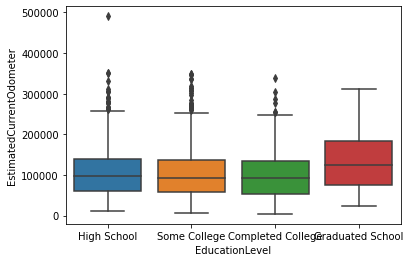

In [43]:
vis1 = sns.boxplot(data=dataset1,x="EducationLevel",y="EstimatedCurrentOdometer")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


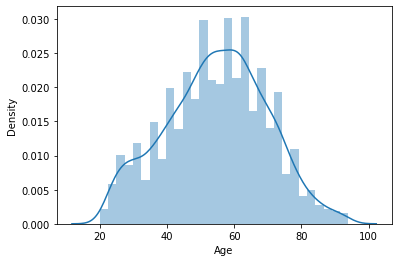

In [44]:
vis2 = sns.distplot(dataset1["Age"],bins=30)

In [45]:
##no group difference on gender
dataset1.groupby("GenderCode")["Age"].mean()

GenderCode
0    54.812035
1    54.982222
Name: Age, dtype: float64

1    3823
0    1981
Name: GenderCode, dtype: int64

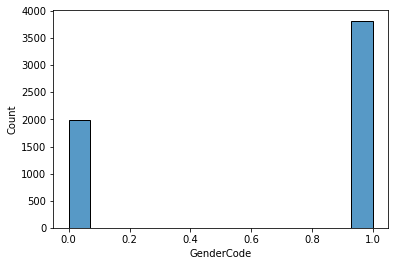

In [46]:
##more male vs female
dataset1[["GenderCode"]].describe()
vis6 = sns.histplot(dataset1["GenderCode"])
dataset1["GenderCode"].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


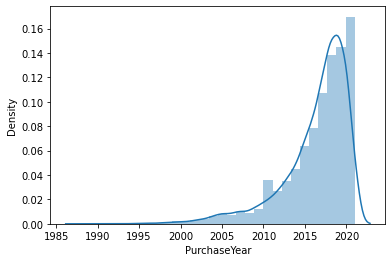

In [47]:
vis3 = sns.distplot(dataset1["PurchaseYear"],bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


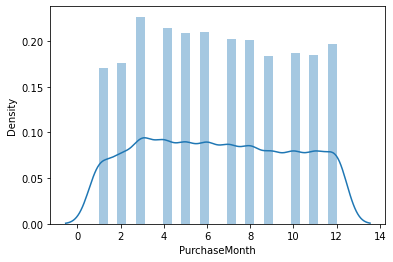

In [49]:
vis4 = sns.distplot(dataset1["PurchaseMonth"])

In [51]:
##dataset2 = pd.crosstab(index=dataset1['PurchaseYear'], columns='count')
##dataset2.rename(columns = {"col_0	count": "count"},inplace=True) 

0        NaN
1         9 
2         2 
3         9 
4         7 
        ... 
12197    NaN
12198    NaN
12199    NaN
12200     5 
12201     4 
Name: WealthRating, Length: 12202, dtype: object

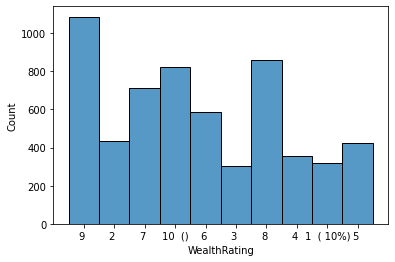

In [52]:
#dataset1['WealthRating'].astype(int)
## in the 9th or 8th percentile 
vis5 = sns.histplot(dataset1["WealthRating"])
dataset1.WealthRating

In [18]:
dataset1[["WealthRating"]].describe()

,WealthRating
count,5910
unique,10
top,9
freq,1087


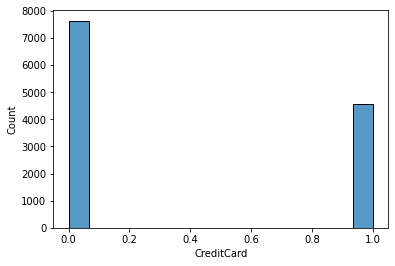

In [55]:
##credit card##majority don't have credit card
dataset1["CreditCard"].value_counts()
vis7 = sns.histplot(dataset1["CreditCard"])

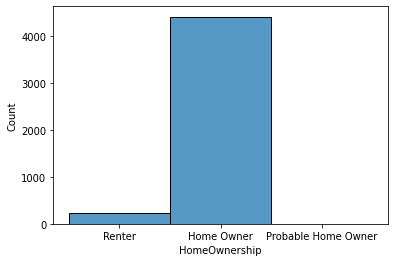

In [56]:
#dominant amount of home owner
dataset1["HomeOwnership"].value_counts()
vis8 = sns.histplot(dataset1["HomeOwnership"])

Some College         1933
High School          1318
Completed College     396
Graduated School       59
Name: EducationLevel, dtype: int64

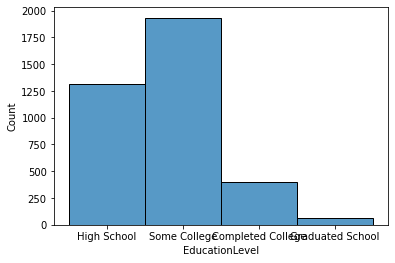

In [60]:
##education level
vis9 = sns.histplot(dataset1["EducationLevel"])
dataset1["EducationLevel"].value_counts()

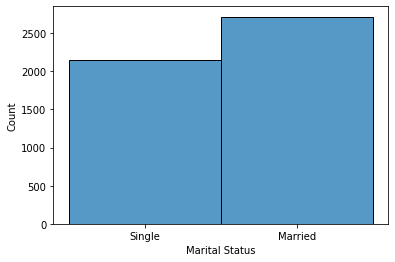

In [61]:
##most married 
vis10 = sns.histplot(dataset1['Marital Status'])


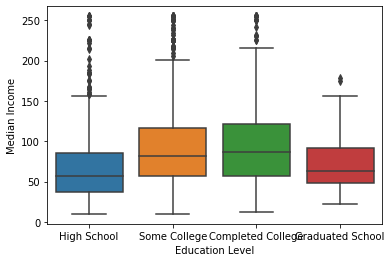

In [76]:
dataset[["Median Income"]]
dataset3=dataset[["Median Income","Education Level"]]
dataset3
##graduted school earn similar to high school
vis11 = sns.boxplot(data=dataset3,x="Education Level",y="Median Income")


In [135]:
freq.max()
freq.describe

<bound method NDFrame.describe of                                                    EstimatedCurrentOdometer
Occupation                                                                 
Accountants                                                    98059.000000
Architects                                                    108859.800000
Attorneys                                                     124639.000000
Beauty (Cosmetologist, Barber, Manicurist, Nails)             103053.833333
Chiropractors                                                 150804.000000
Civil Servant                                                  84076.750000
Clerical or Service Worker                                    105360.245283
Computer Professional                                          65064.500000
Counselors                                                    134354.000000
Dentist/Dental Hygienist                                       75576.500000
Doctors/Physicians/Surgeons                           

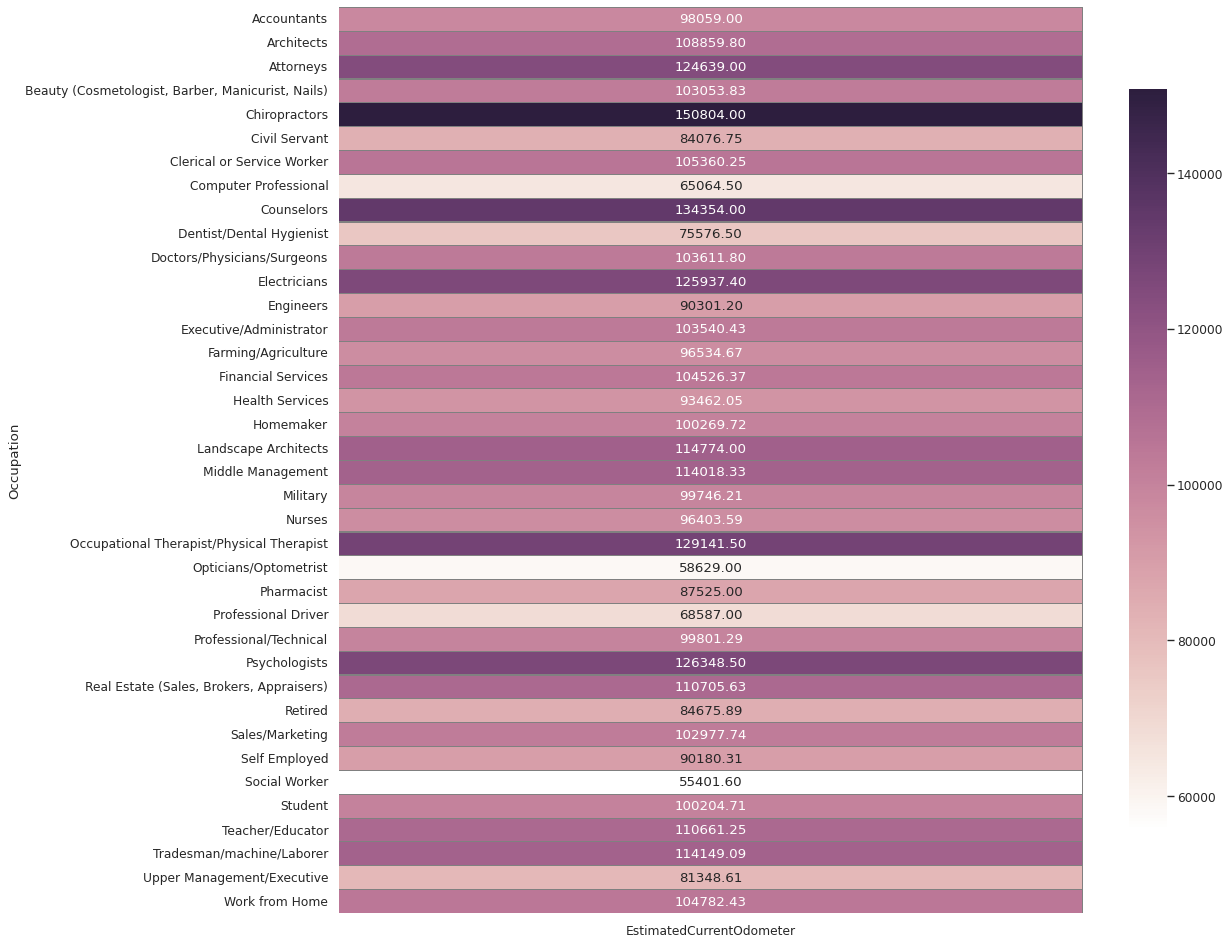

In [138]:
##vis13 = sns.boxplot(data=dataset1,x="Occupation",y="EstimatedCurrentOdometer")
##sns.set(rc = {'figure.figsize':(500,100)})
freq=dataset1.groupby("Occupation")["EstimatedCurrentOdometer"].mean()
freq = pd.DataFrame(freq)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
vis14 = sns.heatmap(freq, annot=True, vmin=55401.0, vmax=150804.0, 
              fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},linewidths=0.1, linecolor='gray')
#res1=sns.heatmap(freq)
